In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-tv-shows-and-movies/credits.csv
/kaggle/input/netflix-tv-shows-and-movies/titles.csv


![netflix](https://i.pcmag.com/imagery/reviews/05cItXL96l4LE9n02WfDR0h-5..v1582751026.png)

<h1 style="color:black;font-size:50px; font-weight:bold;"><center><b>EXPLORATORY DATA ANALYSIS ON NETFLIX DATASET</center></h1> 

About Netflix

Netflix, Inc. is an American subscription streaming service and production company. Launched on August 29, 1997, it offers a film and television series library through distribution deals as well as its own productions, known as Netflix Originals.

As of March 31, 2022, Netflix had over 221.6 million subscribers worldwide, including 74.6 million in the United States and Canada, 74.0 million in Europe, the Middle East and Africa, 39.9 million in Latin America and 32.7 million in Asia-Pacific. It is available worldwide aside from Mainland China, Syria, North Korea, and Russia. Netflix has played a prominent role in independent film distribution, and it is a member of the Motion Picture Association (MPA).

Netflix can be accessed via web browsers or via application software installed on smart TVs, set-top boxes connected to televisions, tablet computers, smartphones, digital media players, Blu-ray players, video game consoles and virtual reality headsets on the list of Netflix-compatible devices.It is available in 4K resolution. In the United States, the company provides DVD and Blu-ray rentals delivered individually via the United States Postal Service from regional warehouses.

Netflix was founded on the aforementioned date by Reed Hastings and Marc Randolph in Scotts Valley, California. Netflix initially both sold and rented DVDs by mail, but the sales were eliminated within a year to focus on the DVD rental business. In 2007, Netflix introduced streaming media and video on demand. The company expanded to Canada in 2010, followed by Latin America and the Caribbean. Netflix entered the content-production industry in 2013, debuting its first series House of Cards. In January 2016, it expanded to an additional 130 countries and then operated in 190 countries.

The company is ranked 115th on the Fortune 500 and 219th on the Forbes Global 2000. It is the second largest entertainment/media company by market capitalization as of February, 2022. In 2021, Netflix was ranked as the eighth-most trusted brand globally by Morning Consult.During the 2010s, Netflix was the top-performing stock in the S&P 500 stock market index, with a total return of 3,693%.

### Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
from math import sqrt
import plotly.graph_objects as go
import statsmodels.api as sm
import os
import math
from datetime import datetime
from datetime import timedelta
import plotly.express as px
import ast
import random


In [3]:
df= pd.read_csv('../input/netflix-tv-shows-and-movies/titles.csv')

# **Data Preprocessing**

In [4]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [5]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [7]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


In [8]:
def figure_size():
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(10)
    font = {'family' : 'normal','size'   : 13}
    
    
    
def repair_array_bound_categories(arr):
    arr = ast.literal_eval(arr)
    
    if len(arr) == 0:
        return np.nan
    
    elif len(arr) == 1:
        return arr[0]
    
    else:
        return random.choice(arr)

In [9]:
df["production_countries"] = df["production_countries"].apply(repair_array_bound_categories)
df["genres"] = df["genres"].apply(repair_array_bound_categories)

In [10]:
df.isnull().sum()


id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                    59
production_countries     229
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

# **Analyze Of Types**

In [11]:
types = df.groupby('type').size().reset_index().rename(columns = {0:'counts'})
types

,type,counts
0,MOVIE,3744
1,SHOW,2106


<Figure size 1080x720 with 0 Axes>

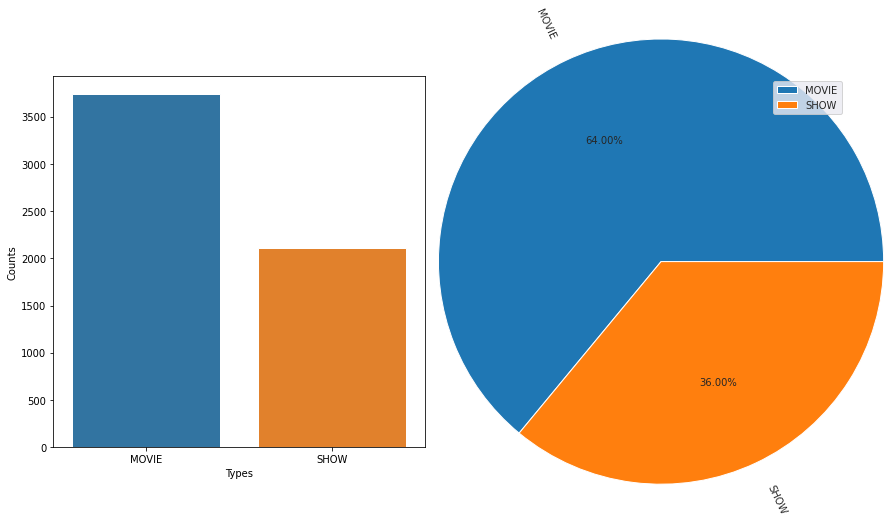

In [12]:
figure_size()
langs= types.type
fig, axes = plt.subplots(1,2, figsize=(12,6))
plt.tight_layout(pad=2)
sns.set_style("darkgrid")
a1=sns.barplot(x = types.type,y = types.counts,ax=axes[0]);
a1.set(xlabel='Types', ylabel='Counts')
plt.pie(types.counts,autopct='%1.2f%%',labels = langs,radius=1.5,labeldistance=1.1 ,   rotatelabels=True)
plt.legend()
plt.show()

## **Observation**

It has been Observed That Netflix has Movies(64.74) more than Shows(32.26).

In [13]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

# **Analyze of Age Certifications**

<Figure size 1080x720 with 0 Axes>

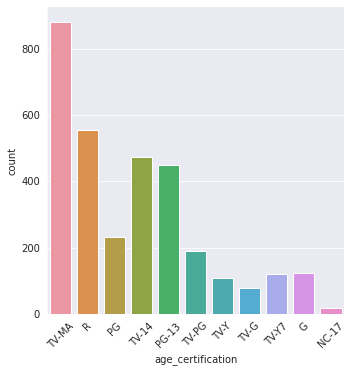

In [14]:
figure_size()
sns.catplot(x='age_certification',kind="count",data=df)
plt.xticks(rotation=45)
plt.show()

## **Observation**
* TV_MA: asigned to be viewed by adults and therefore may be unsuitable for children under 17

# **Analyze Of Genres**

<Figure size 1080x720 with 0 Axes>

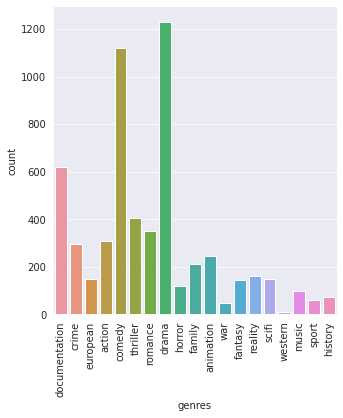

In [15]:
figure_size()
sns.catplot(x='genres', kind="count", data=df)
plt.xticks(rotation=90)
plt.show()

# **Observation**
drama is the most popular Genre.

# **Analyze of Production Countries**

In [16]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [17]:
countries = df.groupby('production_countries').size().reset_index().sort_values(by = 0,ascending = 0).reset_index().drop('index',axis = 1).rename(columns = {0:'counts'})
countries

,production_countries,counts
0,US,2118
1,IN,610
2,GB,310
3,JP,268
4,KR,223
...,...,...
89,PY,1
90,Lebanon,1
91,MC,1
92,MU,1


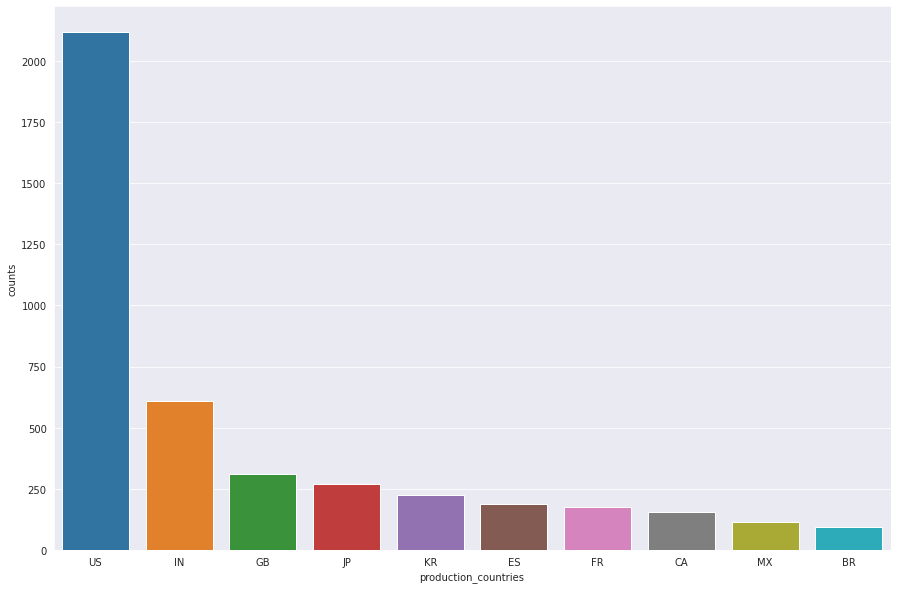

In [18]:
figure_size()
sns.barplot(x = countries.production_countries[:10],y = countries.counts[:10]);
plt.show()

In [19]:

labels = ['US','IN','JP','GB','KR','ES','FR','CA','MX','BR','PH','TR','NG','DE','AU']
values = [1950, 605, 266, 219,210,159,124,103,95,86,80,79,67,65,62]

In [20]:
fig = px.pie(df, values=values, names=labels, title='Most Popular Production Countries')
fig.show()

# **Observation**

As we can observe US is the Most Popular Production Countries.

# **Analyze Of Release Years**

In [21]:
year = df.groupby(['release_year']).size().reset_index().rename(columns = {0:"counts",'release_year':'Year'})
year

,Year,counts
0,1945,1
1,1954,2
2,1956,1
3,1958,1
4,1959,1
...,...,...
58,2018,773
59,2019,836
60,2020,814
61,2021,787


In [22]:
# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(year.Year), y=list(year.counts)))

# Set title
fig.update_layout(
    title_text="No of Movies & Shows Release Over the Years"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [23]:
release_year_count= df.release_year.value_counts()
release_year_count = pd.DataFrame(release_year_count)
release_year_count


,release_year
2019,836
2020,814
2021,787
2018,773
2017,563
...,...
1960,1
1974,1
1959,1
1978,1


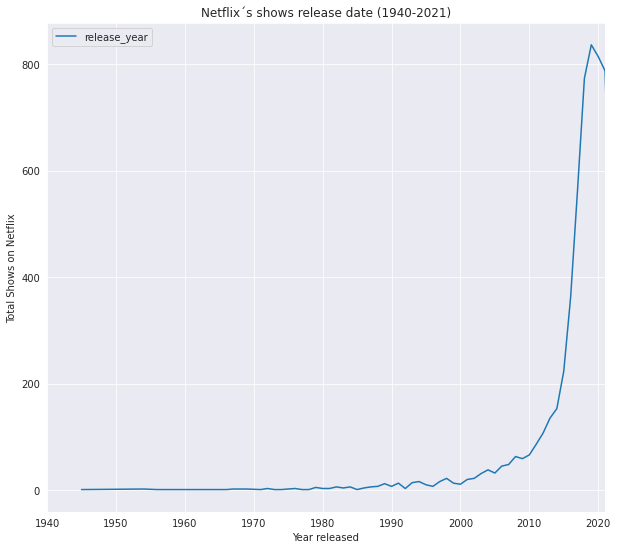

In [24]:
plt.figure(figsize=(10, 9))
sns.lineplot(data= release_year_count)
plt.title('Netflix´s shows release date (1940-2021)')
plt.xlim(1940, 2021)
plt.xlabel('Year released')
plt.ylabel('Total Shows on Netflix')
plt.show()


# **Observation**

It has been Observed That most of the Movies are released in 2019.

It has been Observed That most of the Movies are released in period of  2010-2019.

# **Deep Analysis**

# **Analyze Of Genre of Each Age Certification**

<AxesSubplot:xlabel='age_certification', ylabel='count'>

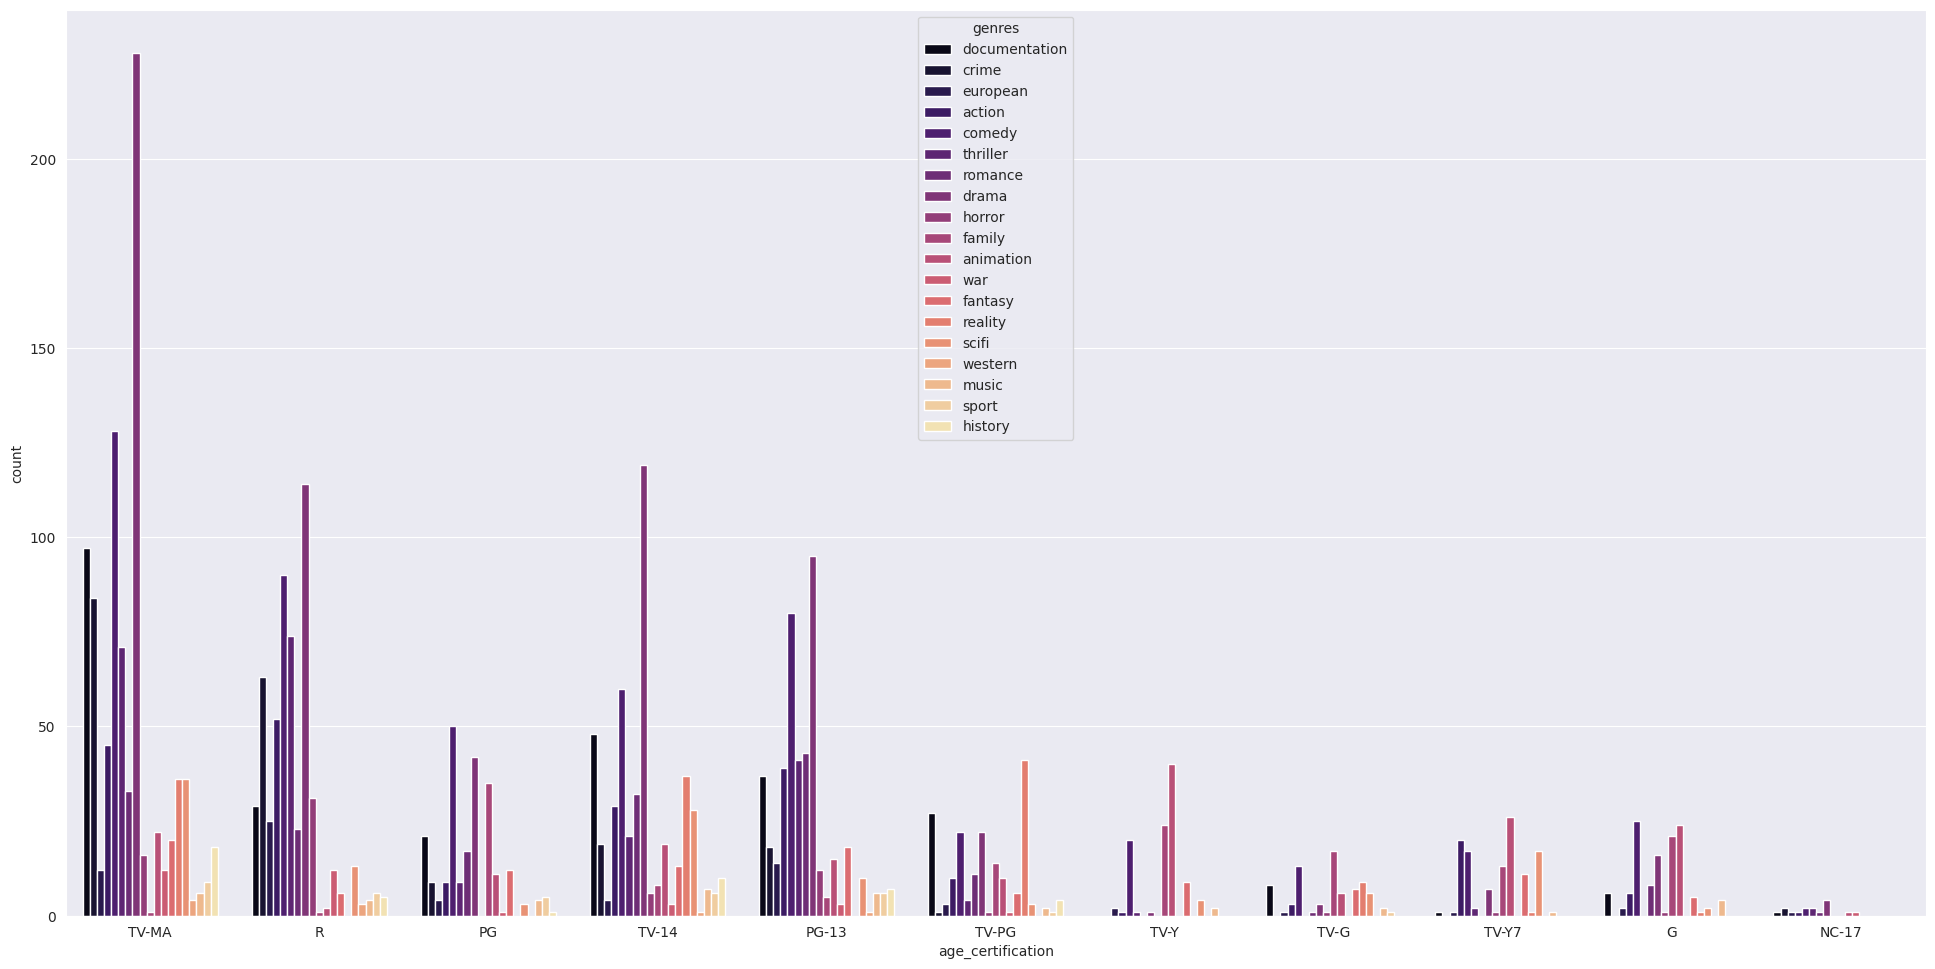

In [25]:
plt.figure(figsize=(24, 12), dpi=100)
sns.countplot(data=df, x="age_certification", hue="genres",palette = 'magma')


**Now let's see imdb_score and tmdb_score**

In [26]:
b= df.groupby('genres')[['imdb_score']].sum().reset_index()
b.head()

,genres,imdb_score
0,action,1817.4
1,animation,1351.8
2,comedy,6638.2
3,crime,1887.1
4,documentation,3772.7


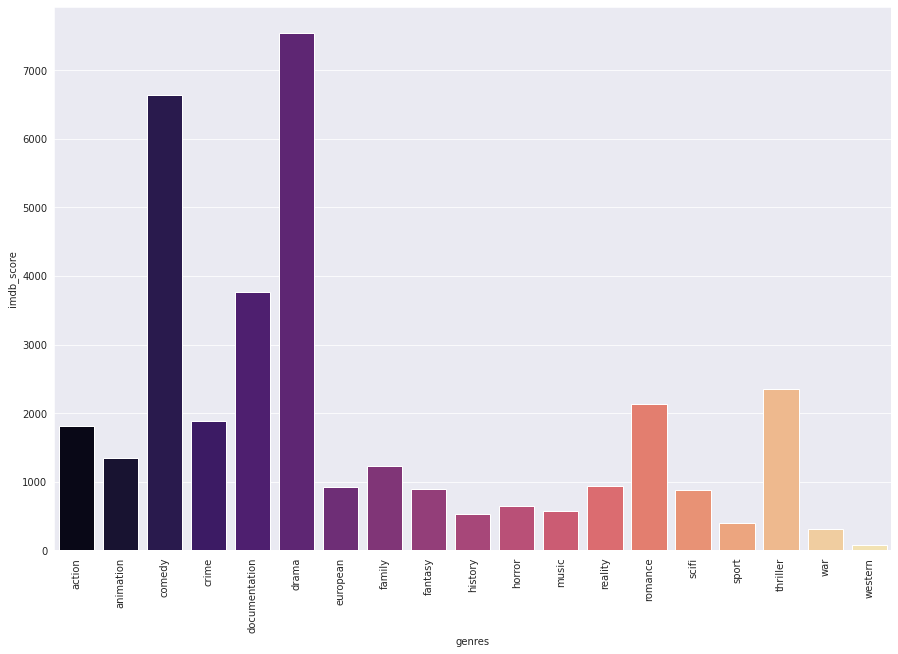

In [27]:
figure_size()
sns.barplot(x='genres',y='imdb_score',data=b,palette = 'magma')
plt.xticks(rotation=90)
plt.show()

In [28]:
b= df.groupby('genres')[['tmdb_score']].sum().reset_index()
b.head()

,genres,tmdb_score
0,action,2024.131
1,animation,1547.310
2,comedy,7150.699
3,crime,1971.959
4,documentation,4144.276


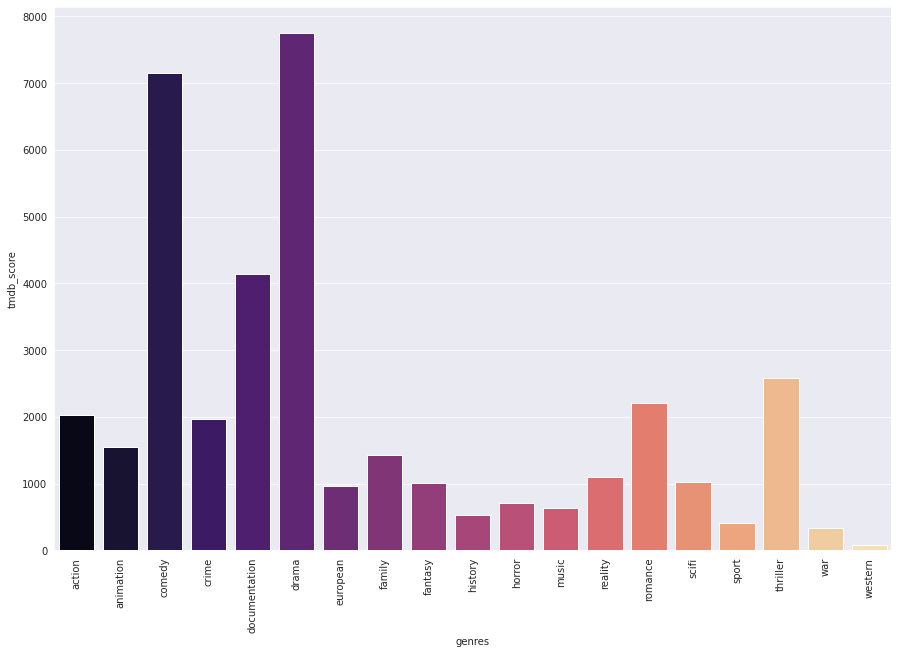

In [29]:
figure_size()
sns.barplot(x='genres',y='tmdb_score',data=b,palette = 'magma')
plt.xticks(rotation=90)
plt.show()

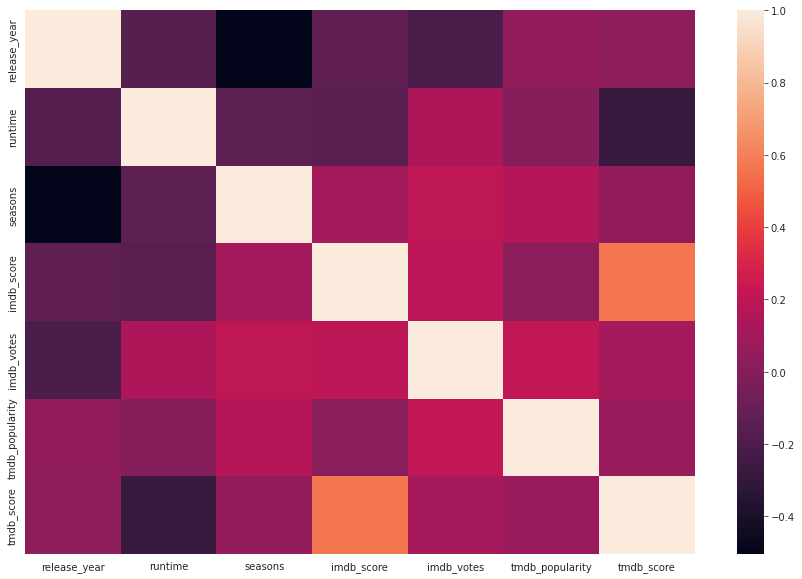

In [30]:
df_num = df[['release_year', 'runtime',   'seasons',  'imdb_score', 'imdb_votes', 'tmdb_popularity',  'tmdb_score']]
figure_size()
sns.heatmap(df_num.corr())
plt.show()

## **Thank You for Reviewing My Notebook. I Will Further Upgrade It More**

## **EDA Done By Rimmel Asghar with ❤**

![that'sallfolks](https://i.ytimg.com/vi/AYZz_qYw_j4/maxresdefault.jpg)